In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, re, glob, cv2, numpy as np
from os import listdir
from os.path import isfile, join

#Pre-Processing

In [ ]:
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from os.path import isfile, join
from os import listdir

# Fungsi untuk pre-processing citra dengan augmentasi
def preprocess_image(image_path, target_size=(200, 200)):
    # Membaca citra
    image = cv2.imread(image_path)

    # Resizing citra ke ukuran target
    image = cv2.resize(image, target_size)

    # Augmentasi citra
    datagen = ImageDataGenerator(
        rotation_range=20,  # Rotasi dalam rentang 20 derajat
        horizontal_flip=True  # Flip horizontal
    )

    # Memperluas dimensi citra agar sesuai dengan input generator
    image = image.reshape((1,) + image.shape)

    # Menghasilkan citra augmentasi secara real-time
    augmented_images = []
    for batch in datagen.flow(image, batch_size=20):
        augmented_image = batch[0]
        augmented_images.append(augmented_image)
        if len(augmented_images) >= 20:  # Misalnya, ambil tiga citra augmentasi
            break

    # Segmentasi citra (contoh: segmentasi menggunakan thresholding)
    # Anda dapat menyesuaikan teknik segmentasi sesuai dengan kebutuhan
    segmented_images = []
    for augmented_image in augmented_images:
        gray = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2GRAY)
        _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
        segmented_images.append(binary_image)

    return segmented_images  # Anda dapat mengembalikan citra yang telah di-segmentasi

# Direktori tempat citra disimpan
image_directory = "/content/drive/My Drive/Citra Sampah"

images = []  # Variabel untuk kumpulan citra yang telah di-preprocess
labels = []  # Variabel untuk kumpulan label (nama sub-folder)

for root, dirs, files in os.walk(image_directory):
    path = root.split(os.sep)
    label = path[-1]  # Mengambil nama sub-folder sebagai label
    for index, file in enumerate(files):
        im2 = [f for f in listdir(root) if isfile(join(root, f))]
        image_path = join(root, im2[index])
        preprocessed_images = preprocess_image(image_path)  # Pre-processing citra
        images.extend(preprocessed_images)
        labels.extend([label] * len(preprocessed_images))


KeyboardInterrupt: ignored

In [ ]:
import cv2
import os
from os.path import isfile, join
from os import listdir

# Fungsi untuk pre-processing citra tanpa augmentasi
def preprocess_image(image_path, target_size=(200, 200)):
    # Membaca citra
    image = cv2.imread(image_path)

    # Resizing citra ke ukuran target
    image = cv2.resize(image, target_size)

    # Segmentasi citra (contoh: segmentasi menggunakan thresholding)
    # Anda dapat menyesuaikan teknik segmentasi sesuai dengan kebutuhan
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    return [binary_image]  # Anda dapat mengembalikan citra yang telah di-segmentasi

# Direktori tempat citra disimpan
image_directory = "/content/drive/My Drive/Citra Sampah"

images = []  # Variabel untuk kumpulan citra yang telah di-preprocess
labels = []  # Variabel untuk kumpulan label (nama sub-folder)

for root, dirs, files in os.walk(image_directory):
    path = root.split(os.sep)
    label = path[-1]  # Mengambil nama sub-folder sebagai label
    for index, file in enumerate(files):
        im2 = [f for f in listdir(root) if isfile(join(root, f))]
        image_path = join(root, im2[index])
        preprocessed_images = preprocess_image(image_path)  # Pre-processing citra
        images.extend(preprocessed_images)
        labels.extend([label] * len(preprocessed_images))


IndexError: ignored

In [ ]:
labels

In [ ]:
images

In [ ]:
#Jumlah Citra
sum = 0
for i in images:
  sum += 1
print("Maka jumlah citra: ", sum)

sum_org = 0
sum_kertas = 0
sum_arg = 0
#label
for j in labels:
  if (j == "Organik"):
    sum_org += 1
  elif (j == "Kertas"):
    sum_kertas += 1
  else:
    sum_arg += 1

print(f"Jumlah organik: {sum_org}, \nJumlah kertas: {sum_kertas}, \nJumlah anorganik: {sum_arg}")

Maka jumlah citra:  15420
Jumlah organik: 4840, 
Jumlah kertas: 5020, 
Jumlah anorganik: 5560


In [ ]:
from sklearn.model_selection import train_test_split
# Menggantikan penggunaan dataset MNIST dengan dataset Anda
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Ubah ukuran citra dan tipe data seperti yang telah Anda lakukan sebelumnya
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils import to_categorical

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Langkah 1: Mengubah label-label menjadi nilai numerik
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Langkah 2: Melakukan one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_encoded = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes=num_classes)

In [ ]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
from tensorflow.keras import backend as K

K.clear_session()


In [ ]:
# Model dan kode pelatihan Anda di sini
def larger_model():
    # create model
    model = Sequential()
    # Conv2D layer 1
    model.add(Conv2D(30, (3, 3), input_shape=(200, 200, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv2D layer 2
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    # Hidden layer 1
    model.add(Dense(128, activation='relu'))
    # Hidden layer 2
    model.add(Dense(50, activation='relu'))
    # Output layer 1
    model.add(Dense(32, activation='relu'))
    # Output layer 2
    model.add(Dense(16, activation='relu'))
    # Output layer 3
    model.add(Dense(8, activation='relu'))
    # Output layer 4
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = larger_model()

# Fit the model
model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=30, batch_size=20)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Large CNN Error: %.2f%%" % (100 - scores[1] * 100))


Epoch 1/30
617/617 [==============================] - 18s 9ms/step - loss: 0.9669 - accuracy: 0.5045 - val_loss: 0.7603 - val_accuracy: 0.6469
Epoch 2/30
617/617 [==============================] - 5s 7ms/step - loss: 0.4698 - accuracy: 0.8119 - val_loss: 0.3592 - val_accuracy: 0.8638
Epoch 3/30
617/617 [==============================] - 4s 7ms/step - loss: 0.1011 - accuracy: 0.9660 - val_loss: 0.3297 - val_accuracy: 0.8972
Epoch 4/30
617/617 [==============================] - 4s 7ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.2828 - val_accuracy: 0.8988
Epoch 5/30
617/617 [==============================] - 4s 7ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.3907 - val_accuracy: 0.9147
Epoch 6/30
617/617 [==============================] - 4s 7ms/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 0.4081 - val_accuracy: 0.9014
Epoch 7/30
617/617 [==============================] - 4s 7ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.3700 - val_accuracy: 0.9147
Epoch

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # Set to the GPU index you want to use


#Transfer Learning

In [ ]:
X_train_rgb = np.repeat(X_train[:, :, :, np.newaxis], 3, axis=3)
X_test_rgb = np.repeat(X_test[:, :, :, np.newaxis], 3, axis=3)

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train_rgb = X_train_rgb / 255
X_test_rgb = X_test_rgb / 255

##Menggunakan Transfer Learning

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Buat objek KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
print("X_train_rgb shape:", X_train_rgb.shape)
print("y_train_encoded shape:", y_train_encoded.shape)


In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Load a pre-trained model (e.g., DenseNet201) with weights from ImageNet
base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# Freeze layers in the base_model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
def create_transfer_model():
    model = models.Sequential()
    model.add(base_model)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.GlobalAveragePooling2D())  # Replace Dense layer with GlobalAveragePooling2D
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


# Compile the model
def compile_model(model):
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
if np.array_equal(X_train_rgb.shape, y_train_encoded.shape):
    print("Training data dimensions are the same.")
else:
    print("Training data dimensions are different.")


In [ ]:
# Define the number of folds and data
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train_rgb[train_index], X_train_rgb[test_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[test_index]
    model = create_transfer_model()
    model = compile_model(model)

    # Train the model with the training data
    model.fit(X_train_fold, y_train_fold, epochs=23, batch_size=200, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the validation data
    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    accuracies.append(accuracy)

    # Get predictions on the validation data
    predictions = model.predict(X_val_fold)

    # Convert prediction probabilities to class labels
    predicted_labels = np.argmax(predictions, axis=1)  # Assuming classification task

Epoch 1/23
50/50 [==============================] - 37s 412ms/step - loss: 1.0948 - accuracy: 0.3942 - val_loss: 1.0401 - val_accuracy: 0.4684
Epoch 2/23
50/50 [==============================] - 13s 267ms/step - loss: 1.0459 - accuracy: 0.4337 - val_loss: 1.0385 - val_accuracy: 0.4182
Epoch 3/23
50/50 [==============================] - 13s 268ms/step - loss: 1.0334 - accuracy: 0.4458 - val_loss: 1.0186 - val_accuracy: 0.4866
Epoch 4/23
50/50 [==============================] - 13s 268ms/step - loss: 1.0207 - accuracy: 0.4587 - val_loss: 1.0177 - val_accuracy: 0.4895
Epoch 5/23
50/50 [==============================] - 13s 268ms/step - loss: 1.0144 - accuracy: 0.4732 - val_loss: 1.0148 - val_accuracy: 0.4643
Epoch 6/23
50/50 [==============================] - 13s 268ms/step - loss: 1.0071 - accuracy: 0.4741 - val_loss: 0.9968 - val_accuracy: 0.4984
Epoch 7/23
50/50 [==============================] - 13s 267ms/step - loss: 0.9993 - accuracy: 0.4929 - val_loss: 0.9974 - val_accuracy: 0.4660

In [ ]:
    # Calculate precision, recall, and F1-score
    precision = precision_score(np.argmax(y_val_fold, axis=1), predicted_labels, average='weighted')
    recall = recall_score(np.argmax(y_val_fold, axis=1), predicted_labels, average='weighted')
    f1 = f1_score(np.argmax(y_val_fold, axis=1), predicted_labels, average='weighted')

    # Append the scores to the lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_precision = np.mean(precisions)
std_precision = np.std(precisions)
mean_recall = np.mean(recalls)
std_recall = np.std(recalls)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

# Print the results
print("Validation accuracies for each fold:", accuracies)
print("Mean accuracy:", mean_accuracy)
print("Standard deviation of accuracy:", std_accuracy)

print("Precision scores for each fold:", precisions)
print("Mean precision:", mean_precision)
print("Standard deviation of precision:", std_precision)

print("Recall scores for each fold:", recalls)
print("Mean recall:", mean_recall)
print("Standard deviation of recall:", std_recall)

print("F1 scores for each fold:", f1_scores)
print("Mean F1 score:", mean_f1)
print("Standard deviation of F1 score:", std_f1)

Validation accuracies for each fold: [0.5226904153823853, 0.5415484309196472, 0.5650587677955627, 0.5419538021087646, 0.5338467955589294]
Mean accuracy: 0.5410196423530579
Standard deviation of accuracy: 0.013902820694465521
Precision scores for each fold: [0.588251146883468]
Mean precision: 0.588251146883468
Standard deviation of precision: 0.0
Recall scores for each fold: [0.5338467774625051]
Mean recall: 0.5338467774625051
Standard deviation of recall: 0.0
F1 scores for each fold: [0.5261191845635549]
Mean F1 score: 0.5261191845635549
Standard deviation of F1 score: 0.0


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img_path = "/content/drive/My Drive/Kertas.jpg"
img = image.load_img(img_path, target_size=(200, 200))  # Sesuaikan dengan ukuran input model Anda
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
img_array = img_array / 255.0  # Normalisasi gambar jika diperlukan

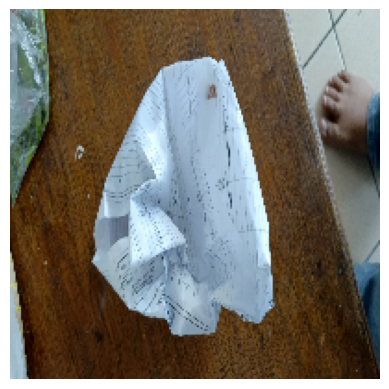

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
# Read the image
img = cv2.imread("/content/drive/My Drive/Kertas.jpg")

# Check if the image is successfully loaded
if img is None:
    print("Error: Unable to load the image. Please check the file path.")
else:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize the image to match the expected input shape (200x200)
    img_resized = cv2.resize(img_gray, (200, 200))

    # Expand dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_resized, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)  # Add a channel dimension

    # Normalize pixel values to be between 0 and 1
    img_array = img_array / 255.0

    # Now you can make predictions
    predicted_class = model.predict(img_array)
    predicted_label = np.argmax(predicted_class)
    predicted_class = label_encoder.classes_[predicted_label]

    # Print the predicted class
    print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 19ms/step
Predicted class: Kertas


In [ ]:
img_path = "/content/drive/My Drive/Organik.jpg"
img = image.load_img(img_path, target_size=(200, 200))  # Sesuaikan dengan ukuran input model Anda
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
img_array = img_array / 255.0  # Normalisasi gambar jika diperlukan

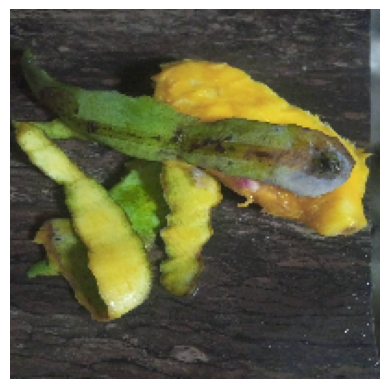

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
# Read the image
img = cv2.imread("/content/drive/My Drive/Organik.jpg")

# Check if the image is successfully loaded
if img is None:
    print("Error: Unable to load the image. Please check the file path.")
else:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize the image to match the expected input shape (200x200)
    img_resized = cv2.resize(img_gray, (200, 200))

    # Expand dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_resized, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)  # Add a channel dimension

    # Normalize pixel values to be between 0 and 1
    img_array = img_array / 255.0

    # Now you can make predictions
    predicted_class = model.predict(img_array)
    predicted_label = np.argmax(predicted_class)
    predicted_class = label_encoder.classes_[predicted_label]

    # Print the predicted class
    print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 20ms/step
Predicted class: Organik


In [ ]:
img_path = "/content/drive/My Drive/Anorganik.jpg"
img = image.load_img(img_path, target_size=(200, 200))  # Sesuaikan dengan ukuran input model Anda
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
img_array = img_array / 255.0  # Normalisasi gambar jika diperlukan

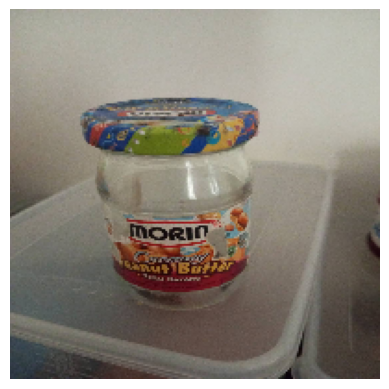

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
# Read the image
img = cv2.imread("/content/drive/My Drive/Anorganik.jpg")

# Check if the image is successfully loaded
if img is None:
    print("Error: Unable to load the image. Please check the file path.")
else:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize the image to match the expected input shape (200x200)
    img_resized = cv2.resize(img_gray, (200, 200))

    # Expand dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_resized, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)  # Add a channel dimension

    # Normalize pixel values to be between 0 and 1
    img_array = img_array / 255.0

    # Now you can make predictions
    predicted_class = model.predict(img_array)
    predicted_label = np.argmax(predicted_class)
    predicted_class = label_encoder.classes_[predicted_label]

    # Print the predicted class
    print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 19ms/step
Predicted class: Anorganik


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_model_filename = 'your_model.tflite'
with open(tflite_model_filename, 'wb') as f:
    f.write(tflite_model)

print(f'TFLite model saved to {tflite_model_filename}')

TFLite model saved to your_model.tflite
